# Series Temporais

* A tendência refere-se ao movimento de uma série para valores relativamente mais altos ou mais baixos durante um longo período de tempo.
* O ruído ou irregularidade é alguma forma de variação aleatória dentro da time series.
* A sazonalidade refere-se a um padrão repetitivo dentro de um período de tempo fixo.

## Alucar - ANalisando  vendas

In [2]:
%autosave 120

Autosaving every 120 seconds


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("alucar.csv")

In [5]:
df.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [6]:
df.shape

(24, 2)

In [7]:
df.isna().sum().sum() # dados nulos no total, independente da coluna , por isso o segundo sum

0

In [8]:
df.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
# importante data ser datetime

df.mes = pd.to_datetime(df.mes)
df.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [10]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt


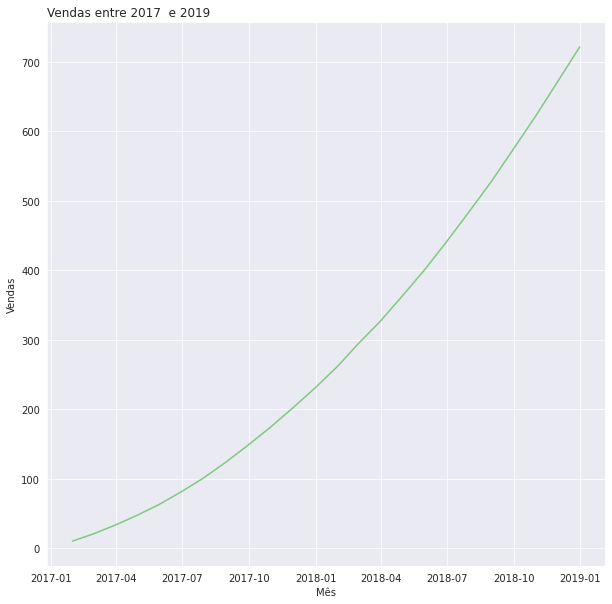

In [11]:
# as vendas estao aumentando ou diminuindo? 

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=df)
ax.figure.set_size_inches(10,10)
ax.set_title("Vendas entre 2017  e 2019", loc='left', fontsize=12)
ax.set_xlabel("Mês")
ax.set_ylabel("Vendas")
ax = ax # para sumir o textinho que fica aparecendo 

* Conforme o tempo passa as vendas aumentam 

## Decomposição 

* para mensurar o crescimento mês a mês

In [12]:
df['aumento'] = df.vendas.diff()
df.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [13]:
def plotar(titulo, xlabel, ylabel, x, y , df):
    
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=df)
    ax.figure.set_size_inches(10,10)
    ax.set_title(titulo, loc='left', fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel=ylabel)
    ax = ax # para sumir o textinho que fica aparecendo 

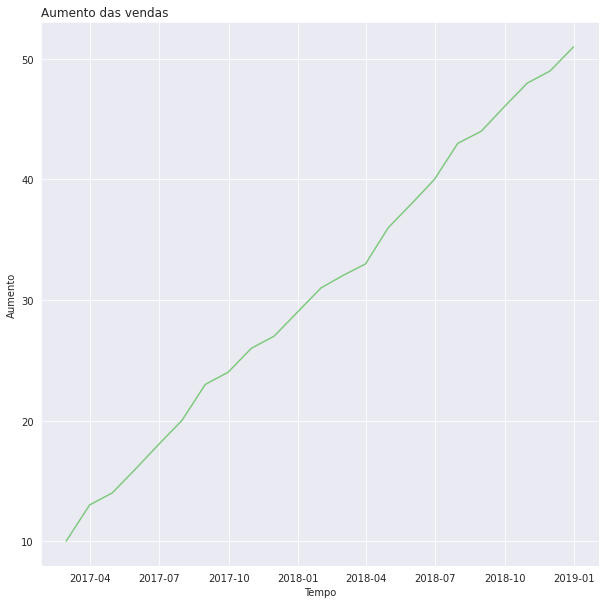

In [14]:
plotar('Aumento das vendas', 'Tempo', 'Aumento', 'mes', 'aumento', df)

* Decomposicao para saber o aumento das vendas

In [15]:
df['aceleracao'] = df.aumento.diff()
df.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


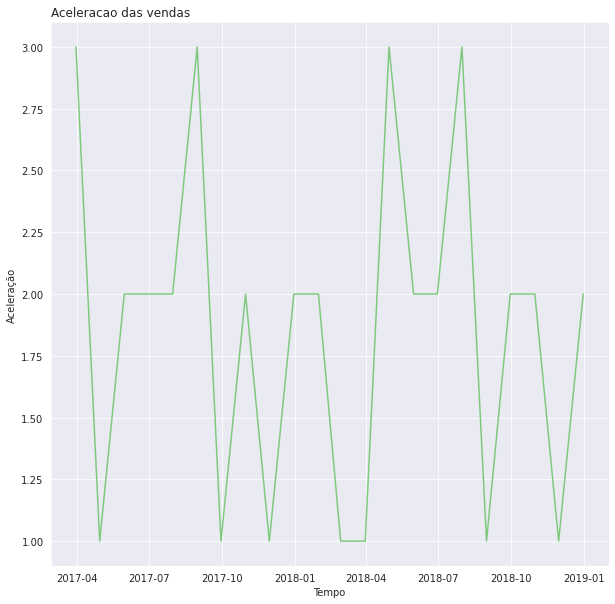

In [16]:
plotar("Aceleracao das vendas", 'Tempo', 'Aceleração', 'mes', 'aceleracao', df)

* Decompomos novamente para saber a aceleração do crescimento

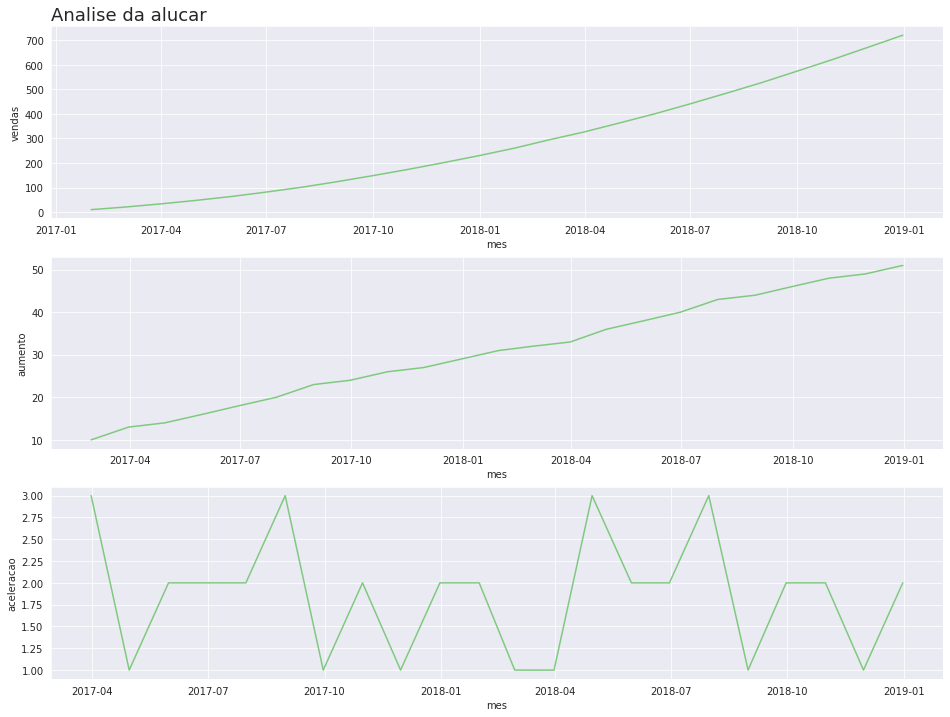

In [17]:
plt.figure(figsize=(16,12))
ax=plt.subplot(3,1,1)
ax.set_title('Analise da alucar', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=df)
ax=plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=df)
ax=plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=df)

ax =ax


* Observamos uma tendencia de cresciemnto

In [18]:
def plot_comparacao(x, y1, y2, y3, df, titulo):
    plt.figure(figsize=(16,12))
    ax=plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=df)
    ax=plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=df)
    ax=plt.subplot(3,1,3)
    sns.lineplot(x=x, y= y3, data=df)

    ax =ax
    
    

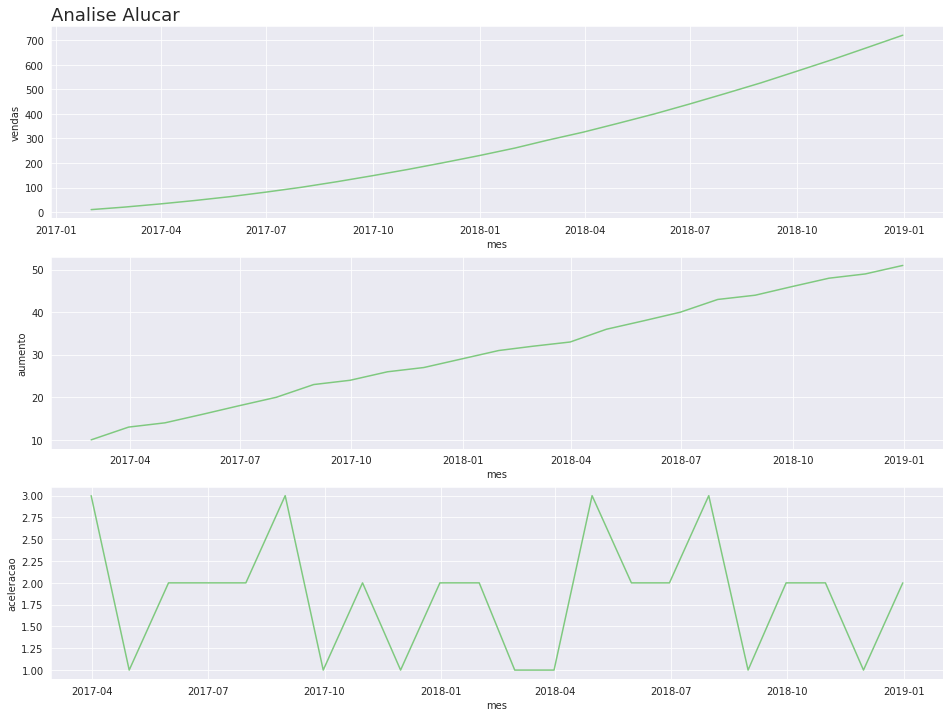

In [19]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', df, 'Analise Alucar')

### Autocorrelação: comparar os valores com eles mesmos - utilizando lag -

*Autocorrelação significa a correlação de valores de uma mesma variável ordenados no tempo.



In [20]:
from pandas.plotting import autocorrelation_plot



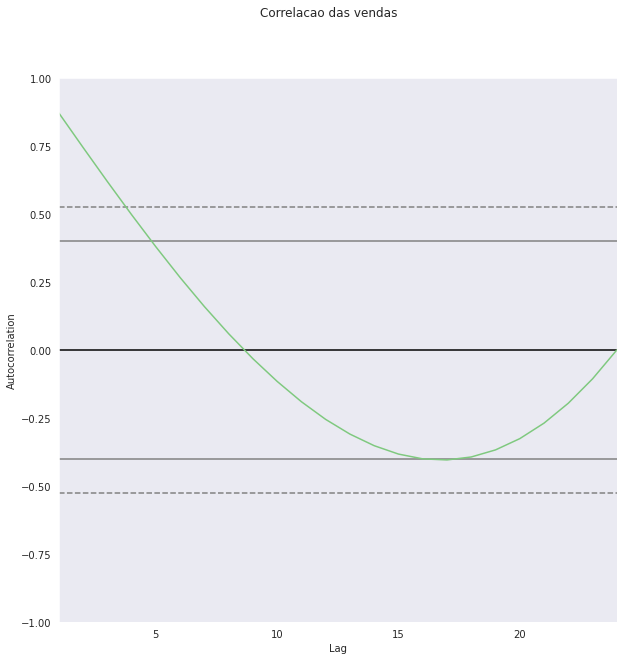

In [21]:
ax = plt.figure(figsize=(10,10))
autocorrelation_plot(df.vendas)
ax.suptitle('Correlacao das vendas')
ax = ax

* Os 7 primeiros dias tem uma correlacao mais forte

## Analisando a newslater

In [22]:
news = pd.read_csv('newsletter_alucar.csv')
news.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [23]:
news.dtypes

mes           object
assinantes     int64
dtype: object

In [24]:
news.shape

(24, 2)

In [25]:
news.isna().sum().sum()

0

In [26]:
news['mes'] = pd.to_datetime(news.mes)

In [27]:
news['aumento'] = news.assinantes.diff()
news['aceleracao'] =news.aumento.diff()

In [28]:
news.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


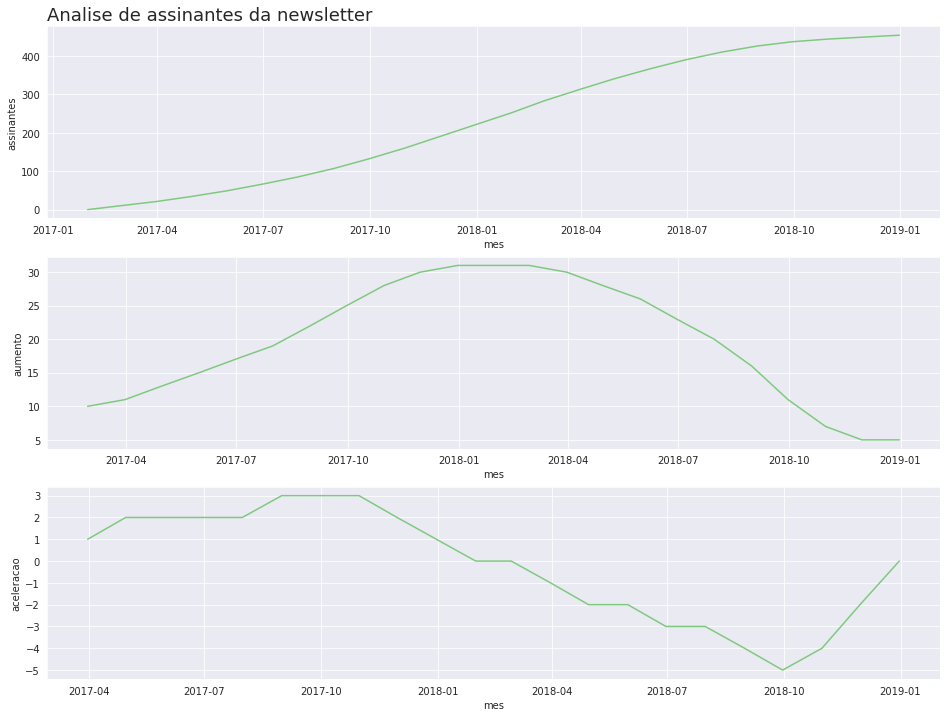

In [29]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', news,'Analise de assinantes da newsletter')

* Analisando o primeiro grafico observamos uma tendencia de crescimento, no entanto ao analisarmos o segundo vemos que o crescimento tem uma queda e no ultimo observamos que inicialmente teve um crescimento, depois caiu( deixou de crescer) e mais tard voltou a crescer (desacelerou o crescimento). 

# Chocolura

In [30]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [31]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [32]:
chocolura.mes = pd.to_datetime(chocolura.mes)

In [33]:
chocolura.shape
chocolura.isna().sum().sum()

0

In [34]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] =chocolura.aumento.diff()

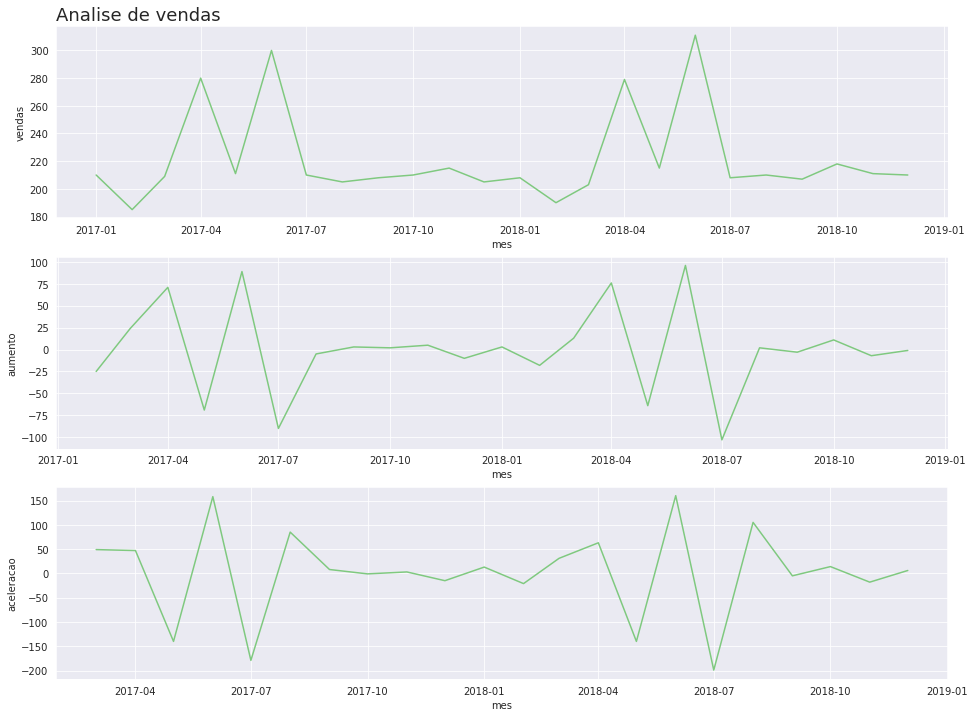

In [35]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura,'Analise de vendas')

* Podemos observar sazonalidade ( março e junho)
* Isso eh observado no grafico de aumento 
* E isso tbm é observado no grafico de aceleracao

### Chocolura vendas de outubro e novembro

In [36]:
vendas_dia = pd.read_csv('vendas_por_dia.csv')
vendas_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [37]:
vendas_dia.shape
vendas_dia.isna().sum().sum()

0

In [38]:
vendas_dia.dtypes

dia       object
vendas     int64
dtype: object

In [39]:
vendas_dia.dia = pd.to_datetime(vendas_dia.dia)
vendas_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [40]:
vendas_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [41]:
vendas_dia['aumento'] = vendas_dia.vendas.diff()
vendas_dia['aceleracao'] =vendas_dia.aumento.diff()

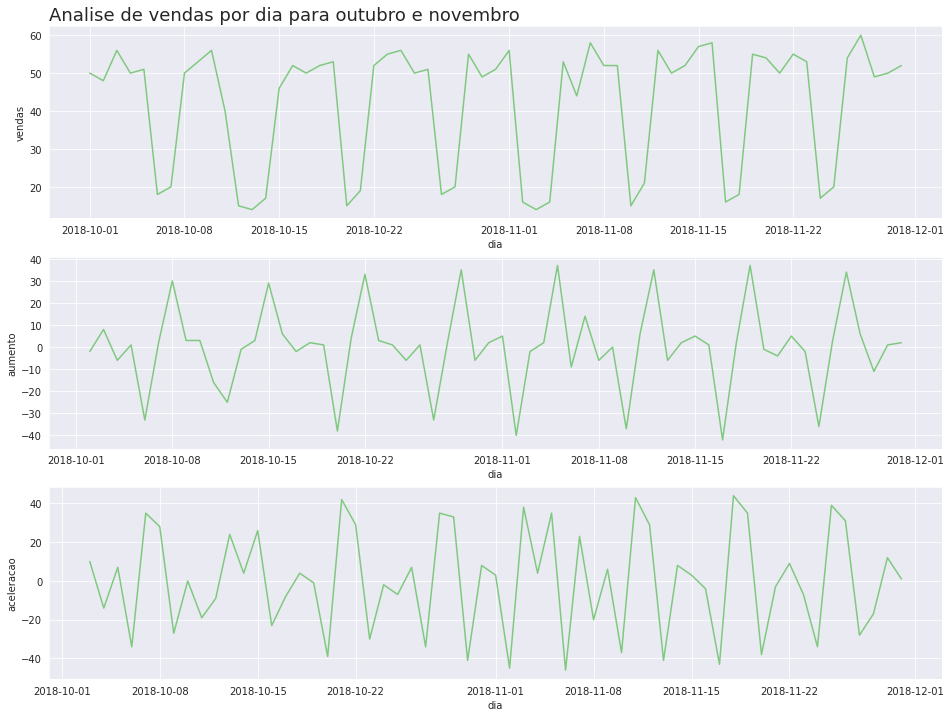

In [42]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_dia,'Analise de vendas por dia para outubro e novembro')

### Analisando a sazonalidade 

In [43]:
vendas_dia['dia_semana'] = vendas_dia['dia'].dt.day_name()

In [44]:
vendas_dia.head()

,dia,vendas,aumento,aceleracao,dia_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [45]:
vendas_dia.dia_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [46]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 
                   'Friday':'Sexta', 'Saturday':'Sabado','Sunday':'Domingo'}

In [47]:
dias_traduzidos

{'Monday': 'Segunda',
 'Tuesday': 'Terça',
 'Wednesday': 'Quarta',
 'Thursday': 'Quinta',
 'Friday': 'Sexta',
 'Saturday': 'Sabado',
 'Sunday': 'Domingo'}

In [48]:
vendas_dia['dia_semana']= vendas_dia['dia_semana'].map(dias_traduzidos)
vendas_dia.head()

,dia,vendas,aumento,aceleracao,dia_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [49]:
vendas_dia.head(14) # observar duas semanas

,dia,vendas,aumento,aceleracao,dia_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


* sabado e domingo as vendas caem consideravelmente

### Agrupando os dias 

In [50]:
vendas_agrupadas = vendas_dia.groupby('dia_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/home/walkira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [51]:
vendas_agrupadas = vendas_agrupadas.sort_values(by='vendas', ascending=False)
vendas_agrupadas

,vendas,aumento,aceleracao
dia_semana,,,
Quarta,53.0,1.0,2.0
Segunda,52.0,34.0,31.0
Terça,52.0,-1.0,-34.0
Quinta,51.0,-2.0,-3.0
Sexta,45.0,-7.0,-5.0
Domingo,19.0,3.0,31.0
Sabado,16.0,-28.0,-20.0


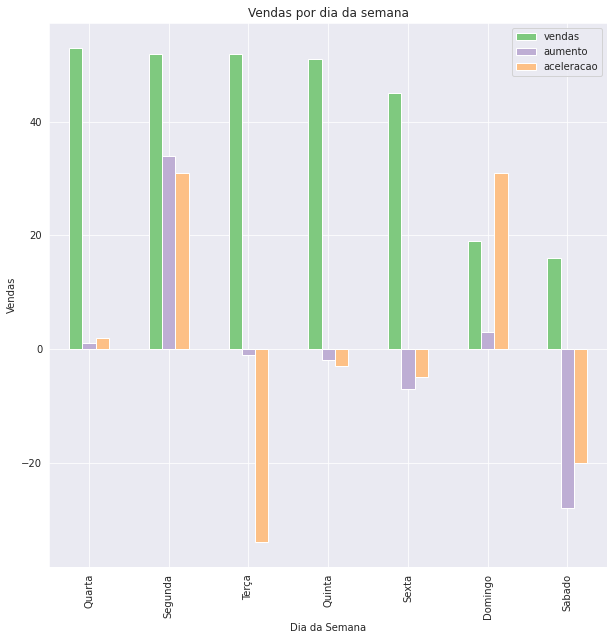

In [52]:
vendas_agrupadas.plot(kind='bar', figsize=(10, 10), rot=90) # rotate the bars by 90 degrees
# plt.figure(figsize=(20,10)) 

plt.xlabel('Dia da Semana')
plt.ylabel('Vendas')
plt.title('Vendas por dia da semana')

# Annotate arrow
# plt.annotate('',                      # s: str. Will leave it blank for no text
#              xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
#              xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
#              xycoords='data',         # will use the coordinate system of the object being annotated 
#              arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
#             )

plt.show()

### Correlacao das vendas diarias

In [53]:
ax = plt.figure(figsize=(10,10))
ax.suptitle('Correlacao das vendas diarias', fontsize = 18)
autocorrelation_plot(allvendas_dia.vendas)
ax =ax

NameError: name 'allvendas_dia' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
ax = plt.figure(figsize=(10,10))
ax.suptitle('Correlacao das vendas diarias', fontsize = 18)
autocorrelation_plot(vendas_dia.aumento[1:])
ax =ax

In [ ]:
ax = plt.figure(figsize=(10,10))
ax.suptitle('Correlacao das vendas diarias', fontsize = 18)
autocorrelation_plot(vendas_dia.aceleracao[2:])
ax =ax

# Cafelura

In [ ]:
cafelura = pd.read_csv('cafelura.csv')

In [ ]:
cafelura.head()
cafelura.dtypes

In [ ]:
cafelura.mes = pd.to_datetime(cafelura.mes)

In [ ]:
cafelura.shape
cafelura.isna().sum().sum()

In [ ]:
plotar("Vendas entre 2017 e 2018", "Tempo", "Vendas", 'mes', 'vendas', cafelura)

*

In [ ]:
qtd_dias_semana = pd.read_csv('dias_final_de_semana.csv')

In [ ]:
qtd_dias_semana.head()

In [ ]:
qtd_dias_semana.quantidade_de_dias.values

In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / qtd_dias_semana.quantidade_de_dias.values
cafelura.head()

In [ ]:
plotar('vendas normalizads', 'Tempo', 'vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

In [ ]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas 2017 e 2018')
sns.lineplot(x='mes', y='vendas',data=cafelura )

ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas pela quantidade de dias de finais de semanas - 2017 e 2018')
sns.lineplot(x='mes', y='vendas_normalizadas',data=cafelura )

ax = ax

### Stats Models

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
resultado = seasonal_decompose(chocolura.vendas, period=3)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
residuo = resultado.resid



In [ ]:
data = ({'observacao': observacao, 'tendencia': tendencia, 'sazonalidade': sazonalidade, 'residuo':residuo})
resultado = pd.DataFrame(data)

In [ ]:
resultado.head()

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'residuo', resultado, 'Exemplo de Statsmodels')

# ALucel

In [ ]:
alucel = pd.read_csv('alucel.csv')

In [ ]:
alucel.head()

In [ ]:
alucel.dia = pd.to_datetime(alucel.dia)


In [ ]:
alucel.shape

In [ ]:
alucel.isna().sum().sum()

In [ ]:
alucel['aumento'] = alucel.vendas.diff()

alucel['aceleracao'] = alucel.aumento.diff()


In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

* Serie com muito ruido: dificil identificar se esta crescendo, frequencias diferentes em muitos pontos

## Medias moveis: tenta diminuir os ruidos

In [ ]:
alucel['media_movel'] = alucel.vendas.rolling(7).mean()

In [ ]:
alucel.head(10)

In [ ]:
plotar('Analise de vendas com media movel com 7 dias', 'dia', 'media_movel', 'dia', 'media_movel', alucel)

In [ ]:
alucel['media_movel_21'] = alucel.vendas.rolling(21).mean()

plotar('Analise de vendas com media movel com 21 dias', 'dia', 'media_movel_21', 'dia', 'media_movel_21', alucel)

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')